<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Liver_Cancer_(LIHC)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.LIHC.sampleMap_HiSeqV2_PANCAN.gz  TCGA.LIHC.sampleMap_LIHC_clinicalMatrix


In [5]:
!pip install sparse_lmm

In [6]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.LIHC.sampleMap_LIHC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.LIHC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [7]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LIHC_mutation_bcgsc_gene,_GENOMIC_ID_data/public/TCGA/LIHC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LIHC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LIHC_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LIHC_mutation_broad_gene,_GENOMIC_ID_TCGA_LIHC_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01,TCGA-2V-A95S-01,53796be6-1c87-448a-9928-3c640e9d3414,NaN,53796be6-1c87-448a-9928-3c640e9d3414,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01A-11D-A36Y-05
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01A-12D-A383-05
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01A-11D-A383-05
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,6f3f7f73-b031-424e-ba7c-263f802dd6cf,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01A-11D-A383-05
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01A-11D-A383-05


In [8]:
# Display gene dataset
gene_data.head()

,TCGA-FV-A495-01,TCGA-G3-A3CH-11,TCGA-CC-A3MB-01,TCGA-BC-A3KF-01,TCGA-DD-A4NV-01,TCGA-CC-A1HT-01,TCGA-BD-A3EP-01,TCGA-FV-A3R2-11,TCGA-CC-A3MA-01,TCGA-ZP-A9CV-01,...,TCGA-UB-A7ME-01,TCGA-DD-A4NR-01,TCGA-G3-A25U-01,TCGA-DD-AAE6-01,TCGA-G3-AAV2-01,TCGA-BC-A10Z-11,TCGA-ZP-A9CY-01,TCGA-DD-A39Y-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.317808,1.154608,1.379008,1.297208,2.152708,0.630408,1.704608,1.623908,-0.181992,2.131908,...,2.054208,2.233208,2.631908,2.681008,0.450608,1.612908,1.976308,1.730308,1.894908,1.661008
HIF3A,-0.306526,-0.170026,-1.553426,-2.617326,-0.769026,1.332674,-1.645126,-0.266926,-2.699826,-0.332026,...,-2.335226,-2.547826,-0.016726,-2.982226,-0.632926,-2.351726,-1.031826,-5.554726,-1.795626,-1.608526
RNF17,3.664565,-0.531035,-0.531035,-0.531035,-0.531035,3.990065,6.344665,-0.531035,-0.531035,-0.531035,...,0.141565,6.296965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.272872,-0.108572,0.301528,0.815528,-0.315972,0.076128,0.224028,-0.039372,-0.830372,0.447428,...,-0.101772,0.100028,-0.631672,0.693828,0.084428,0.026428,-0.024972,0.363228,0.313828,0.041328
RNF11,-1.368378,0.430122,-1.143078,-1.021978,-0.131078,-0.153778,-0.531678,-0.151678,-0.022478,-0.084578,...,-0.511478,-0.935778,-0.172778,-1.028278,-0.365578,0.075122,-0.097878,-0.338378,0.609522,0.292622


In [9]:

# Set Basic info

trait = 'liver Cancer'
condition = 'Blood Type'
condition_col = 'ABO'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 109 features, and the gene dataset includes 20530 genes


In [10]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [11]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,ABO,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,-2.669116,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,-3.530016,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,-1.656316,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,-3.644516,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,-0.658016,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [12]:

# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,ABO,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,-2.669116,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088,1
TCGA-2Y-A9GS-01,-3.530016,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,-1.656316,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,-3.644516,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,-0.658016,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1


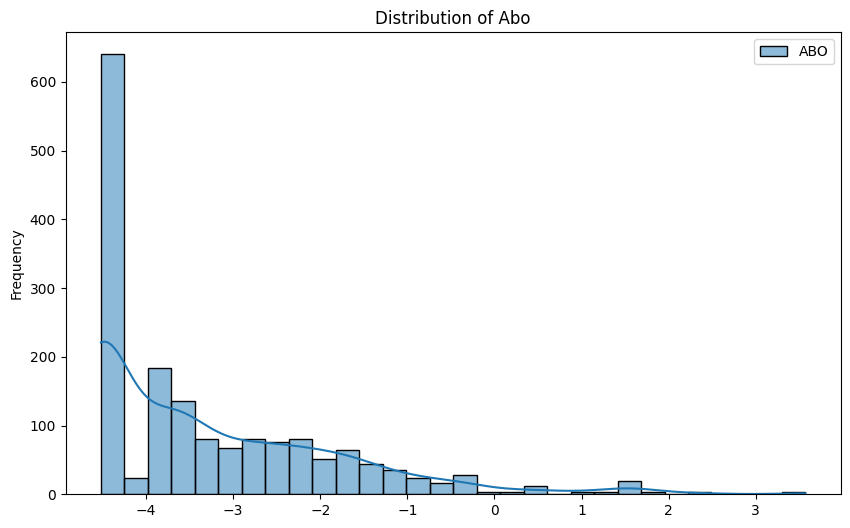

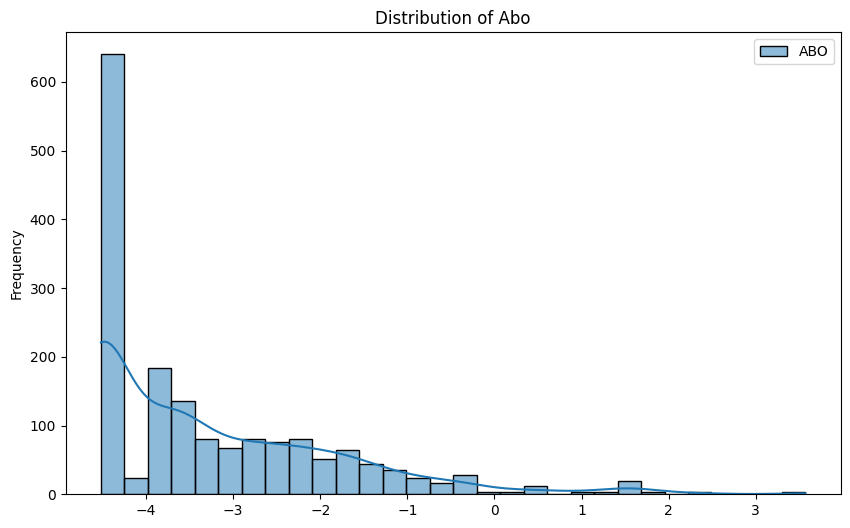

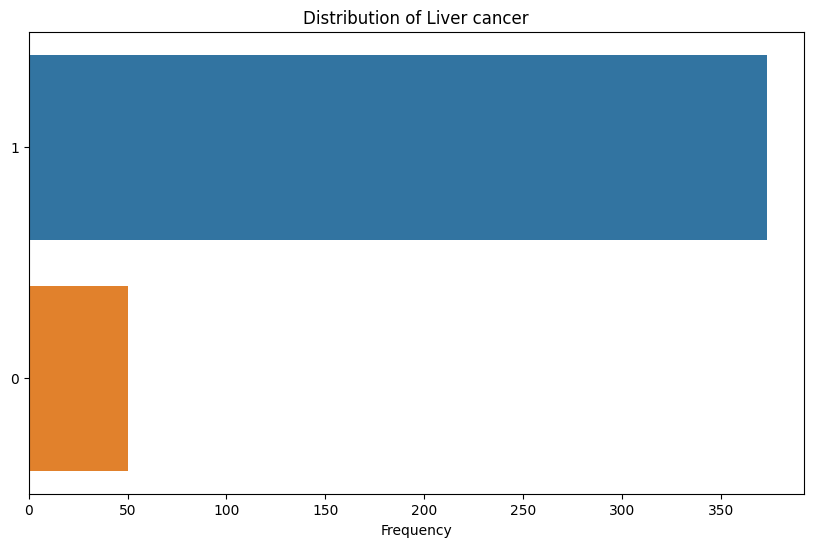

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'abo' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [16]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,Blood Type,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,0,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088,1
TCGA-2Y-A9GS-01,0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1


In [17]:

import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [18]:

def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-17-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-17-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-17-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 78.07% ± 4.02%


In [19]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-17-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [20]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-17-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [21]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: Blood Type
Coefficient: 0.0000
p-value: 1



In [22]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait liver Cancer conditional on the factor Blood Type, sorted by corrected p-value:
     Variable  Coefficient  corrected_p_value
 LOC100169752    -0.440898      1.487269e-160
       OR4C16    -0.440898      1.487269e-160
       OR5D16    -0.440898      1.487269e-160
     KRTAP6-2    -0.440898      1.487269e-160
       OR5D13     0.440898      1.487269e-160
     SNORA36C    -0.440898      1.487269e-160
       TTTY21     0.440898      1.487269e-160
       OR51V1     0.440898      1.487269e-160
       OR51S1     0.440898      1.487269e-160
       TTTY12     0.440898      1.487269e-160
        OR2T1    -0.440898      1.487269e-160
     SNORA70B     0.440898      1.487269e-160
        BSPH1    -0.440898      1.487269e-160
       OR5AS1    -0.440898      1.487269e-160
        OR5M3    -0.440898      1.487269e-160
      OR14A16     0.440898      1.487269e-160
       PRR20B     0.440898      1.487269e-160
        OR4S1     0.440898      1.4